# Main

## Define variables and import the main library

In [1]:
project_directory = '/data/BIDS-HPC/private/projects/dmi2'
import os, sys
links_dir = os.path.join(project_directory, 'data', 'all_gene_expression_files_in_target', 'links')
annotation_file = os.path.join(project_directory, 'data', 'gencode.v22.annotation.gtf')
sample_sheet_file = os.path.join(project_directory, 'data', 'gdc_sample_sheet.2020-07-02.tsv')
metadata_file = os.path.join(project_directory, 'data', 'metadata.cart.2020-07-02.json')
if os.path.join(project_directory, 'checkout') not in sys.path:
    sys.path.append(os.path.join(project_directory, 'checkout'))
import target_class_lib as tc

## Load the data downloaded from the GDC Data Portal

In [2]:
df_samples, df_counts = tc.load_gdc_data(sample_sheet_file, metadata_file, links_dir)

Reading pickle file /data/BIDS-HPC/private/projects/dmi2/data/gdc_data.pkl...


## Calculate the FPKM and FPKM-UQ dataframes, and check them with known values if the needed datafiles are present

In [3]:
df_fpkm, df_fpkm_uq = tc.get_fpkm(df_counts, annotation_file, df_samples, links_dir)

Reading pickle file /data/BIDS-HPC/private/projects/dmi2/data/fpkm_data.pkl...


## Remove from the samples and intensities the samples that correspond to multiple cases (i.e., people)

In [4]:
df_samples, indexes_to_keep, _ = tc.drop_multiperson_samples(df_samples)
df_counts = df_counts.iloc[indexes_to_keep,:]
df_fpkm = df_fpkm.iloc[indexes_to_keep,:]
df_fpkm_uq = df_fpkm_uq.iloc[indexes_to_keep,:]

Dropping the following samples from the samples table:
                                            file list index  \
sample id                                                     
TARGET-30-PANKFE-01A, TARGET-30-PAPUAR-01A             1900   
TARGET-30-PANUKV-01A, TARGET-30-PASUML-01A             3075   
TARGET-30-PAPEAV-01A, TARGET-30-PAPTFZ-01A             3653   
TARGET-30-PASYPX-01A, TARGET-30-PAIXIF-01A             1660   

                                                                             counts file name  \
sample id                                                                                       
TARGET-30-PANKFE-01A, TARGET-30-PAPUAR-01A  71edd401-29be-401e-b2de-f5fdca3964d2.htseq_cou...   
TARGET-30-PANUKV-01A, TARGET-30-PASUML-01A  d5589fcc-c841-43d5-ae2a-ce5ee0914c7e.htseq_cou...   
TARGET-30-PAPEAV-01A, TARGET-30-PAPTFZ-01A  fa6a16c4-9eb9-4f04-a784-1a84f57cb479.htseq_cou...   
TARGET-30-PASYPX-01A, TARGET-30-PAIXIF-01A  34253522-71e6-480e-a832-95491686d146.

## Perform exploratory data analysis on the sample labels

Non-numeric columns with all unique values (1317 of them), with sample values:

 . counts file name        b1b718d9-f950-4c69-93fb-27efdef5b6d8.htseq_counts.txt.gz
 . file id                 23f2294e-eedc-4885-ab0a-96b0230501a9
 . entity_submitter_id     TARGET-52-PASWZZ-01A-01R
 . sample id               TARGET-52-PASWZZ-01A

Non-numeric columns with uniform values:

 . contamination_error     None
 . contamination           None
 . state                   released
 . platform                Illumina

Non-numeric columns with non-unique and non-uniform values:

 . project id              9 

TARGET-ALL-P2    519
TARGET-AML       187
TARGET-NBL       157
TARGET-WT        136
TARGET-ALL-P3    135
TARGET-OS         88
TARGET-RT         70
TARGET-CCSK       13
TARGET-ALL-P1     12
Name: project id, dtype: int64 

 . case id                 1188 

TARGET-15-SJMPAL042946    3
TARGET-30-PARBAJ          2
TARGET-52-PASDLA          2
TARGET-10-PANCVR          2
TARGET-50-PAJPDC          2
    

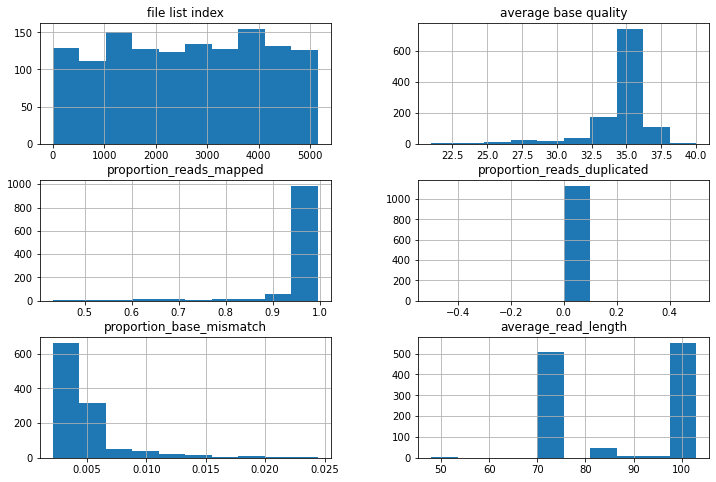

In [5]:
tc.eda_labels(df_samples)

## Plot histograms of the numerical columns of the samples/labels before and after cutoffs are applied, and print out a summary of what was removed

There are 64 bad values in the "average base quality" plot
There are 61 bad values in the "proportion_base_mismatch" plot
There are 54 bad values in the "proportion_reads_mapped" plot
Most bad values are overlapping; taken together, there are 89 bad values
We should likely use these cutoffs to remove the bad samples; this will only remove 6.8% of the data, leaving 1228 good samples
See for example the two generated images: the first is the original data with the cutoffs plotted in red, and the second is the filtered data with the cutoffs applied


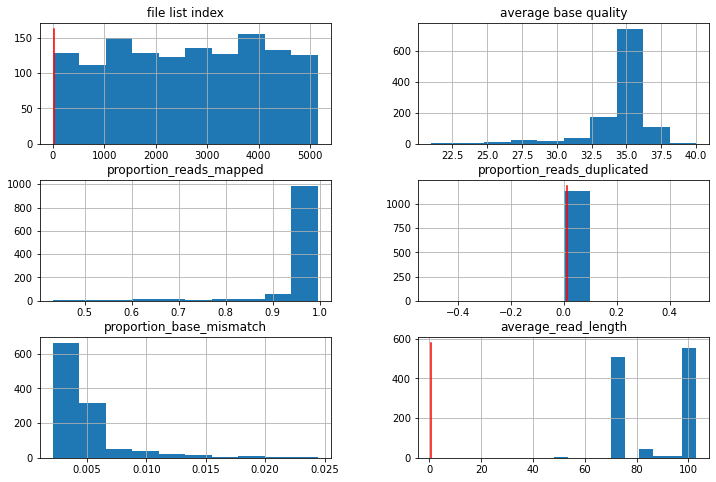

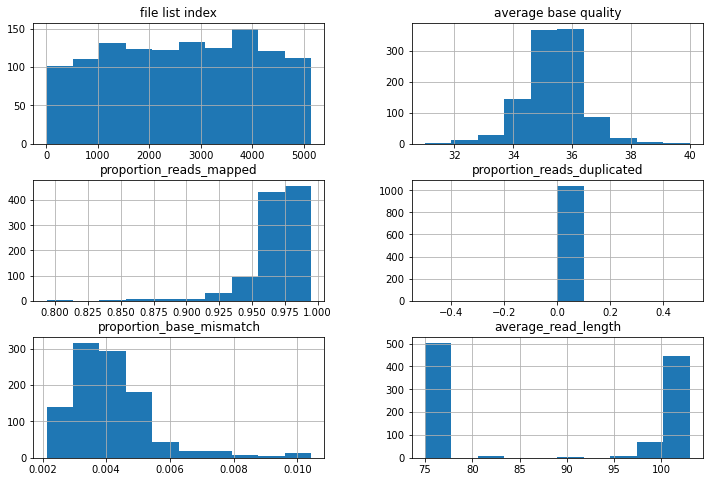

In [6]:
df_samples, indexes_to_keep = tc.remove_bad_samples(df_samples)
df_counts = df_counts.iloc[indexes_to_keep,:]
df_fpkm = df_fpkm.iloc[indexes_to_keep,:]
df_fpkm_uq = df_fpkm_uq.iloc[indexes_to_keep,:]

## Perform exploratory data analysis on the filtered sample labels

Non-numeric columns with all unique values (1228 of them), with sample values:

 . counts file name        66506c2a-410f-4049-af41-426ec2c617e9.htseq_counts.txt.gz
 . file id                 203deee3-ada9-4859-9c1f-39c470c5ab4c
 . entity_submitter_id     TARGET-10-PAUBTC-09A-01R
 . sample id               TARGET-10-PAUBTC-09A

Non-numeric columns with uniform values:

 . contamination_error     None
 . contamination           None
 . state                   released
 . platform                Illumina

Non-numeric columns with non-unique and non-uniform values:

 . project id              9 

TARGET-ALL-P2    518
TARGET-AML       187
TARGET-NBL       143
TARGET-WT        136
TARGET-ALL-P3    135
TARGET-RT         69
TARGET-OS         24
TARGET-CCSK       13
TARGET-ALL-P1      3
Name: project id, dtype: int64 

 . case id                 1099 

TARGET-15-SJMPAL042946    3
TARGET-30-PARBAJ          2
TARGET-10-PANZPJ          2
TARGET-15-SJMPAL016342    2
TARGET-20-PASWAJ          2
    

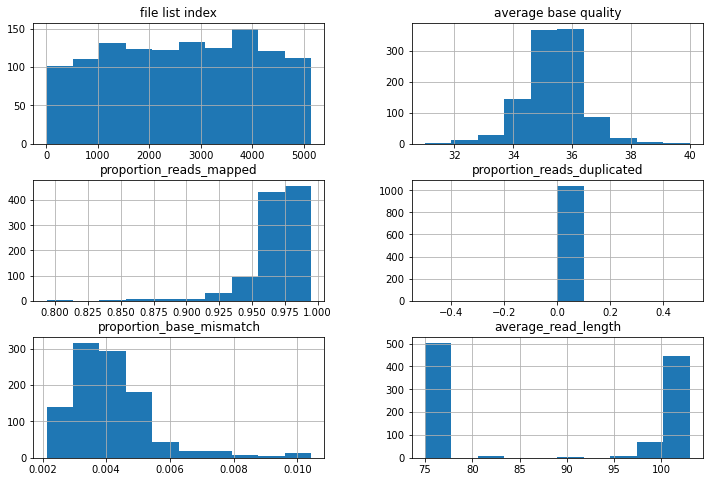

In [7]:
tc.eda_labels(df_samples)

## Print some random data for us to spot-check in the files themselves to manually ensure we have a handle on the data arrays

In [8]:
tc.spot_check_data(df_samples, df_counts, df_fpkm, df_fpkm_uq)

Sample TARGET-10-PAPMVB-09A (TARGET-ALL-P2, Primary Blood Derived Cancer - Bone Marrow) should have a counts value of 143 for gene ENSG00000262420.3
Sample TARGET-10-PANDWE-03A (TARGET-ALL-P2, Primary Blood Derived Cancer - Peripheral Blood) should have a counts value of 720 for gene ENSG00000100296.12
Sample TARGET-50-PAJNTJ-02A (TARGET-WT, Recurrent Tumor) should have a counts value of 3 for gene ENSG00000230370.1
Sample TARGET-52-PAWFBL-01A (TARGET-RT, Primary Tumor) should have a counts value of 1 for gene ENSG00000201491.1
Sample TARGET-15-SJMPAL040035-03A (TARGET-ALL-P3, Primary Blood Derived Cancer - Peripheral Blood) should have a FPKM value of 1.8421441162395884 for gene ENSG00000057935.12
Sample TARGET-50-PAKRCC-01A (TARGET-WT, Primary Tumor) should have a FPKM value of 0.15483634685079176 for gene ENSG00000229421.1
Sample TARGET-20-PASHYZ-09A (TARGET-AML, Primary Blood Derived Cancer - Bone Marrow) should have a FPKM value of 6.041773244474968 for gene ENSG00000172845.12
Sam

## Calculate the TPM using the counts and gene lengths
Note I've confirmed sufficient equality using TPM calculation using FPKM and FPKM-UQ

In [9]:
df_tpm = tc.get_tpm(df_counts, annotation_file)

Reading pickle file /data/BIDS-HPC/private/projects/dmi2/data/annotation_dataframe.pkl...


## Add a labels column based on the project id and sample type columns and show the unique values by decreasing frequency

In [10]:
df_samples['label 1'] = df_samples['project id'] + ', ' + df_samples['sample type']
print(df_samples['label 1'].value_counts())

TARGET-ALL-P2, Primary Blood Derived Cancer - Bone Marrow           379
TARGET-NBL, Primary Tumor                                           135
TARGET-WT, Primary Tumor                                            124
TARGET-AML, Primary Blood Derived Cancer - Bone Marrow              119
TARGET-ALL-P3, Primary Blood Derived Cancer - Bone Marrow           113
TARGET-ALL-P2, Primary Blood Derived Cancer - Peripheral Blood       74
TARGET-ALL-P2, Recurrent Blood Derived Cancer - Bone Marrow          64
TARGET-RT, Primary Tumor                                             63
TARGET-AML, Recurrent Blood Derived Cancer - Bone Marrow             40
TARGET-AML, Primary Blood Derived Cancer - Peripheral Blood          26
TARGET-OS, Primary Tumor                                             24
TARGET-CCSK, Primary Tumor                                           13
TARGET-ALL-P3, Recurrent Blood Derived Cancer - Bone Marrow          12
TARGET-ALL-P3, Primary Blood Derived Cancer - Peripheral Blood  

## Run the variance-stabilizing transformation using DESeq2 using this most-detailed set of labels

In [11]:
X1, y1 = tc.run_vst(df_counts, df_samples['label 1'], project_directory)

Reading pickle file /data/BIDS-HPC/private/projects/dmi2/data/datasets/label_1/vst_transformed_data.pkl...


## Create and plot PCA and tSNE analyses using the variance-stabilizing-transformed data from DESeq2

In [ ]:
# Perform PCA
import sklearn.decomposition as sk_decomp
pca = sk_decomp.PCA(n_components=10)
pca_res = pca.fit_transform(X1.iloc[:,:500])
#pca_res = pca.fit_transform(X1.iloc[:,:])
print('Top {} PCA explained variance ratios: {}'.format(10, pca.explained_variance_ratio_))
ax = tc.plot_unsupervised_analysis(pca_res, y1)
ax.set_title('PCA - variance-stabilizing transformation')

# Perform tSNE analysis
import sklearn.manifold as sk_manif
tsne = sk_manif.TSNE(n_components=2)
tsne_res = tsne.fit_transform(X1.iloc[:,:500])
#tsne_res = tsne.fit_transform(X1.iloc[:,:])
ax = tc.plot_unsupervised_analysis(tsne_res, y1)
ax.set_title('tSNE - variance-stabilizing transformation')

From the above tSNE plot, we find many interesting things, e.g.:

* ALL is spread out in multiple places (all oranges/yellows and early greens), into four main clusters; in particular:
  * ALL/P2/PBDC (both /BM and /PB) is located in three of them
  * ALL/P2/RBDC (i.e., /BM) is basically isolated to one of them
  * ALL/P3 is basically in the fourth cluster
* AML has its own single cluster
* There are some ALL in an AML cluster and vice versa, though the two corresponding clusters are near each other
* CCSK is very tightly clustered
* NBL has its own cluster, with one RT instance that may be misclassified
* OS is tightly clustered, except for two samples in WT, which may indicate that they are misclassified
* Aside from the one possibly misclassified RT, they are all solidly clustered
* WT is clustered together
* The two normal species are very tightly clustered together

## Based on the above observations, make a new set of more sensible labels

See comments in each line in the following code block

In [12]:
df_samples['label 2'] = df_samples['label 1'] # initialize the new label (2) to the original, most-detailed label (1)
df_samples['label 2'][df_samples['label 2'].str.contains('normal', case=False, regex=False)] = 'TARGET-Normal' # set to "TARGET-Normal" any label including "normal" in its original name
df_samples['label 2'] = df_samples['label 2'].str.split(pat=', ', expand=True)[0] # otherwise, just set the label to the project ID (see definition of 'label 1' above)
df_samples['label 2'] = df_samples['label 2'].str.split(pat='-', expand=True)[1] # finally, at the same time, both remove "TARGET-" from the labels and, for ALL, remove "-PX", where X={1,2,3}
print(df_samples['label 2'].value_counts()) # print the final labels counts

ALL       656
AML       187
NBL       143
WT        130
RT         63
OS         24
CCSK       13
Normal     12
Name: label 2, dtype: int64


## Re-label the unsupervised plots above, just as a quick check of our new labeling scheme

In [ ]:
# Define the new labels
y = df_samples['label 2'].copy()
y.index = y.index.str.replace('-', '_')
y = y.loc[y1.index] # order them the same way as the PCA/tSNE results we already calculated

# Redo the plots, with appropriate sorting so that the labels are in alphabetical order
sorting_indexes = y.to_numpy().argsort(axis=0)
ax = tc.plot_unsupervised_analysis(pca_res[sorting_indexes,:], y.iloc[sorting_indexes])
ax.set_title('PCA - variance-stabilizing transformation - with new labels')
ax = tc.plot_unsupervised_analysis(tsne_res[sorting_indexes,:], y.iloc[sorting_indexes])
ax.set_title('tSNE - variance-stabilizing transformation - with new labels')

Note that had we not previously plotted the most detailed set of labels, we would have been left forever wondering why the two distinct clusters of AML data.

## Now actually run the variance-stabilizing transformation using DESeq2 on the re-labeled dataset

In [13]:
X2, y2 = tc.run_vst(df_counts, df_samples['label 2'], project_directory)

Reading pickle file /data/BIDS-HPC/private/projects/dmi2/data/datasets/label_2/vst_transformed_data.pkl...


## Run PCA and tSNE on the new dataset

Top 10 PCA explained variance ratios: [0.57089244 0.11708428 0.04639597 0.03517564 0.02593218 0.01685384
 0.01393864 0.01273613 0.00649362 0.00543036]


Text(0.5, 1.0, 'tSNE - variance-stabilizing transformation')

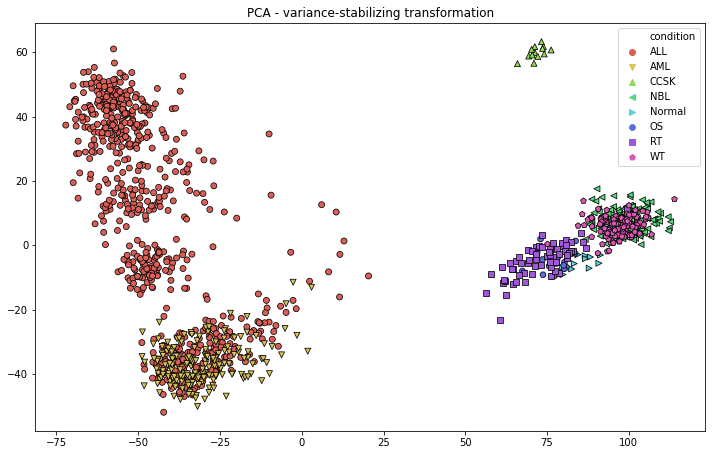

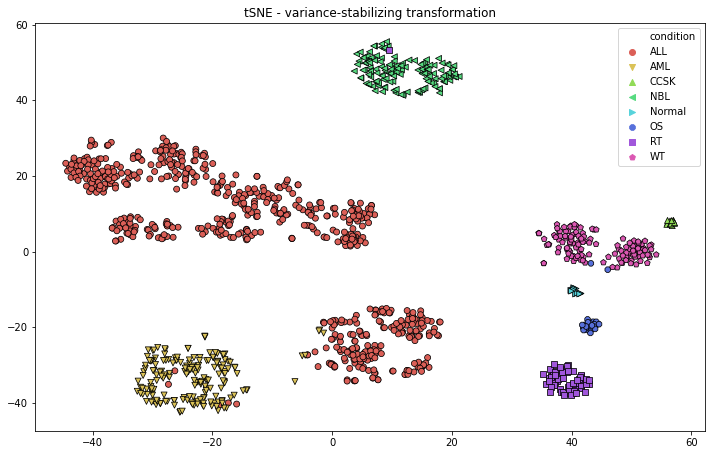

In [14]:
# Perform PCA
import sklearn.decomposition as sk_decomp
pca = sk_decomp.PCA(n_components=10)
pca_res = pca.fit_transform(X2.iloc[:,:500])
print('Top {} PCA explained variance ratios: {}'.format(10, pca.explained_variance_ratio_))
ax = tc.plot_unsupervised_analysis(pca_res, y2)
ax.set_title('PCA - variance-stabilizing transformation')

# Perform tSNE analysis
import sklearn.manifold as sk_manif
tsne = sk_manif.TSNE(n_components=2)
tsne_res = tsne.fit_transform(X2.iloc[:,:500])
ax = tc.plot_unsupervised_analysis(tsne_res, y2)
ax.set_title('tSNE - variance-stabilizing transformation')

In [ ]:
#### PICK UP WITH USING THIS CELL TO FIGURE OUT BEST VALUE OF N TO USE!!!!

n = 200

# Sample the imbalanced dataset, returning the balanced dataset and reproducing indexes
X, y, num_indexes = tc.sample_populations(X2, y2, n=n)

# Plot the sampling results themselves
ax = tc.plot_unsupervised_analysis(tsne_res[num_indexes,:], y2.iloc[num_indexes], alpha=0.5) # note y = y2.iloc[num_indexes]
ax.set_title('tSNE - VST - sample')

# Now plot the sampling results on top of the tSNE of the full dataset in order to see how much we covered
ax = tc.plot_unsupervised_analysis(tsne_res, y2, gray_indexes=num_indexes)
ax.set_title('tSNE - VST - sample in gray on top of original')

# Scratch

In [ ]:
y.to_list()

In [ ]:
y.value_counts()

In [ ]:
y2.value_counts()

In [ ]:
n = 200
# Also, add tc. to the two functions below (in three places total)

# Sample the imbalanced dataset, returning the balanced dataset and reproducing indexes
X, y, num_indexes = sample_populations(X2, y2, n=n)

# Plot the sampling results themselves
ax = plot_unsupervised_analysis(tsne_res[num_indexes,:], y2.iloc[num_indexes], alpha=0.5) # note y = y2.iloc[num_indexes]
ax.set_title('tSNE - VST - sample')

# Now plot the sampling results on top of the tSNE of the full dataset in order to see how much we covered
ax = plot_unsupervised_analysis(tsne_res, y2, gray_indexes=num_indexes)
ax.set_title('tSNE - VST - sample in gray on top of original')

In [ ]:
fracs = [0.5, 0.75, 1, 1.25, 1.5]

In [ ]:
# Plot a PCA or tSNE analysis
def plot_unsupervised_analysis(results, y, figsize=(12,7.5), alpha=1, gray_indexes=None):

    # Sample calls:
    #
    #   # Perform PCA
    #   import sklearn.decomposition as sk_decomp
    #   pca = sk_decomp.PCA(n_components=10)
    #   pca_res = pca.fit_transform(X.iloc[:,:500])
    #   print('Top {} PCA explained variance ratios: {}'.format(10, pca.explained_variance_ratio_))
    #   ax = tc.plot_unsupervised_analysis(pca_res, y)
    #   ax.set_title('PCA - variance-stabilizing transformation')
    #
    #   # Perform tSNE analysis
    #   import sklearn.manifold as sk_manif
    #   tsne = sk_manif.TSNE(n_components=2)
    #   tsne_res = tsne.fit_transform(X.iloc[:,:500])
    #   ax = tc.plot_unsupervised_analysis(tsne_res, y)
    #   ax.set_title('tSNE - variance-stabilizing transformation')
    #

    # Import relevant libraries
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.lines as mpl_lines

    # Get a reasonable set of markers and color palette
    markers = mpl_lines.Line2D.filled_markers
    nclasses = len(set(y))
    marker_list = markers * int(nclasses/len(markers)+1)
    color_palette = sns.color_palette("hls", nclasses)

    # Plot results
    plt.figure(figsize=figsize)
    #ax = sns.scatterplot(x=results[:,0], y=results[:,1], hue=y, style=y, palette=color_palette, legend="full", alpha=alpha, markers=marker_list, edgecolor='k')
    ax = sns.scatterplot(x=results[:,0], y=results[:,1], hue=y, style=y, palette=color_palette, legend="full", alpha=(0.2 if gray_indexes is not None else alpha), markers=marker_list, edgecolor='k')

    if gray_indexes is not None:
        import collections
        gray_indexes=list(collections.OrderedDict.fromkeys(gray_indexes.to_list()))
        #ax = sns.scatterplot(x=results[gray_indexes,0], y=results[gray_indexes,1], hue='gray', style=y.iloc[gray_indexes], palette=color_palette, markers=marker_list, edgecolor='k', ax=ax)
        ax = sns.scatterplot(x=results[gray_indexes,0], y=results[gray_indexes,1], color='gray', style=y.iloc[gray_indexes], palette=color_palette, markers=marker_list, edgecolor='k', ax=ax, alpha=1, legend="full")

    ax.legend(bbox_to_anchor=(1,1))

    # if save_figure:
    #     fig.savefig(os.path.join(data_dir, 'pca_or_tsne_' + transformation_name_filename + '_transformation' + fn_addendum + '.png'), dpi=300, bbox_inches='tight')

    return(ax)


# Sample with replacement each label-group of the potentially unbalanced inputted data matrix and corresponding labels
# Return the corresponding balanced data matrix and corresponding labels, along with the numerical indexes that could be used to obtain these
def sample_populations(X2, y2, n=10):

    # Ensure the indexes of the input matrix and array match
    if not y2.index.equals(X2.index):
        print('ERROR: Indexes of input X and y do not match')
        exit()

    # Initialize the data matrix
    X = X2.copy()

    # Add the column of labels to the data matrix
    X['label'] = y2.copy()

    # Also add a column of the numerical indexes corresponding to the samples in X2 and y2
    X['index2'] = range(len(X))

    # Check that we did what we think we did
    if (not (X.iloc[:,-2] == y2).all()) or (not (X.iloc[:,:-2] == X2).all().all()):
        print('ERROR: We didn\'t correctly place the data and label matrices inside the combined data matrix')
        exit()

    # Sample with replacement each group (unique label) within the combined data matrix
    X = X.groupby('label').sample(n=n, replace=True)

    # Save the sampled labels and numerical indexes and drop those columns from the combined data matrix
    y = X['label']
    num_indexes = X['index2']
    X = X.drop(['label', 'index2'], axis='columns')

    # Ensure that all we really need is num_indexes
    if (not (y2.iloc[num_indexes] == y).all()) or (not (X2.iloc[num_indexes,:] == X).all().all()):
        print('ERROR: We cannot reproduce the results from num_indexes alone, as we should be able')
        exit()

    # Return the balanced data and labels and reproducing numerical indexes
    return(X, y, num_indexes)

In [ ]:



# Plot a PCA or tSNE analysis
#def plot_unsupervised_analysis(results, y, figsize=(12,7.5), alpha=1, gray_indexes=None):

results=tsne_res[num_indexes,:]
#results=tsne_res
y=y2.iloc[num_indexes]
#y=y2
figsize=(12,7.5)
alpha=1
gray_indexes = None
#gray_indexes=num_indexes # default=None

# Import relevant libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mpl_lines

# Get a reasonable set of markers and color palette
markers = mpl_lines.Line2D.filled_markers
nclasses = len(set(y))
marker_list = markers * int(nclasses/len(markers)+1)
color_palette = sns.color_palette("hls", nclasses)

# Plot results
plt.figure(figsize=figsize)
ax = sns.scatterplot(x=results[:,0], y=results[:,1], hue=y, style=y, palette=color_palette, legend="full", alpha=(0.1 if gray_indexes is not None else alpha), markers=marker_list, edgecolor='k')

if gray_indexes is not None:
    import collections
    gray_indexes=list(collections.OrderedDict.fromkeys(gray_indexes.to_list()))
    ax = sns.scatterplot(x=results[gray_indexes,0], y=results[gray_indexes,1], color='gray', style=y.iloc[gray_indexes], palette=color_palette, markers=marker_list, edgecolor='k', ax=ax, alpha=0.6, legend="full")

ax.legend(bbox_to_anchor=(1,1))

In [ ]:
#n = 10
#X = X2.copy()
#y2.index.equals(X.index)
#X['label'] = y2.copy()
#X['index2'] = range(len(X))
#tmp = X.groupby('label').sample(n=n, replace=True)
#(X.iloc[:,:-2] == X2).all().all()
#(X.iloc[:,-2] == y2).all()
#tmp = tmp.rename({'index orig': 'index2'}, axis=1)
#ax = tc.plot_unsupervised_analysis(tsne_res[tmp['index2'],:], y2.iloc[tmp['index2']], alpha=0.5)
#ax.set_title('tSNE - variance-stabilizing transformation - sample')
#(y2.iloc[tmp['index2']] == tmp['label']).all()
#list(set(tmp['index2'].to_list()))
# gray_indexes = list(set(tmp['index2'].to_list()))

In [ ]:
sorting_indexes = y.to_numpy().argsort(axis=0)
y.iloc[sorting_indexes]

In [ ]:
# Old cell

## Write annotation and gene counts files (two files total) that are in the same format as the pasilla example

# Commenting this out since the sample we're taking is random and I don't want to regenerate it as I didn't save the seed
# Don't stress too much about that since this is super easy to regenerate and I should probably implement saving the seed
#tc.write_sample_for_deseq2_input(df_samples['label 1'], df_counts, data_directory, 'three_class_sample')